In [9]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Print loss curves

In [6]:
def create_loss_plots(name):
    def create_df(lines):
        data = [[float(x) for x in re.findall('([-]?\d[\d.]*)',l)[1:3]] for l in lines]
        return pd.DataFrame(data, columns = ['Train Loss','Val Loss'], index = range(1, len(lines)+1))

    with open('Results/GNN3Sizes/'+name+'.txt') as f:
        lines = f.readlines() 

    loss_list = [x for x in lines if x.startswith('Epoch')]
    cuts = [i for i, x in enumerate([x.startswith('Epoch  1:') for x in loss_list]) if x] + [len(loss_list)]
    split_loss_list = [loss_list[cuts[i]:cuts[i+1]] for i in range(len(cuts)-1)]
    df_list = [create_df(ll) for ll in split_loss_list]
    Optimums = [(df['Val Loss'].idxmin(),df['Val Loss'].min()) for df in df_list]

    NN_sizes = [int(re.search("\d+", x)[0]) for x in lines if x.startswith(') ')]
    
    # Plot
    names = [f'Large GNN ({NN_sizes[0]} params)', f'Medium GNN ({NN_sizes[1]} params)', f'Small GNN ({NN_sizes[2]} params)']
    fig, axs = plt.subplots(1, len(df_list), sharey = True, figsize=(24,7))
    fig.suptitle('Loss across epochs for ' + name, fontsize = 24)
    for i in range(len(df_list)):
        df_list[i].plot(ax = axs[i])
        axs[i].set_title(names[i], fontsize = 18)
        axs[i].set_xlabel('Epoch', fontsize = 16)
        axs[i].legend(fontsize = 16)
        axs[i].plot(*Optimums[i], 'o', color='k', markerfacecolor='none')
        axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[0].set_ylim((min([df['Train Loss'].min() for df in df_list])*1.02,max([df['Val Loss'].max() for df in df_list])+0.02))
    axs[0].set_ylabel('Loss', fontsize = 16)

    plt.show()

    return

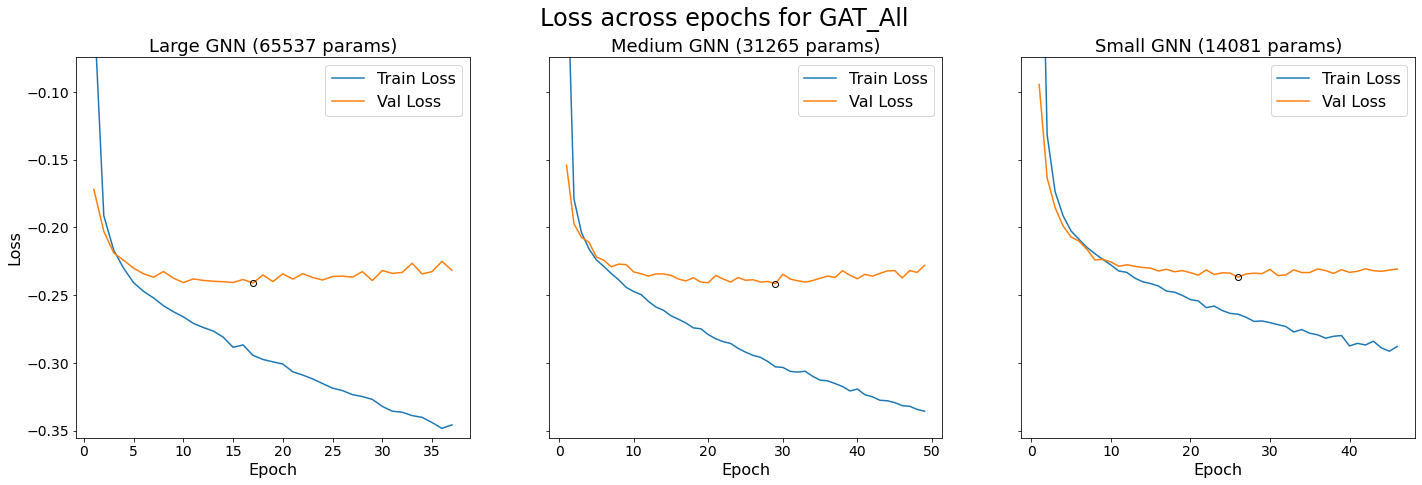

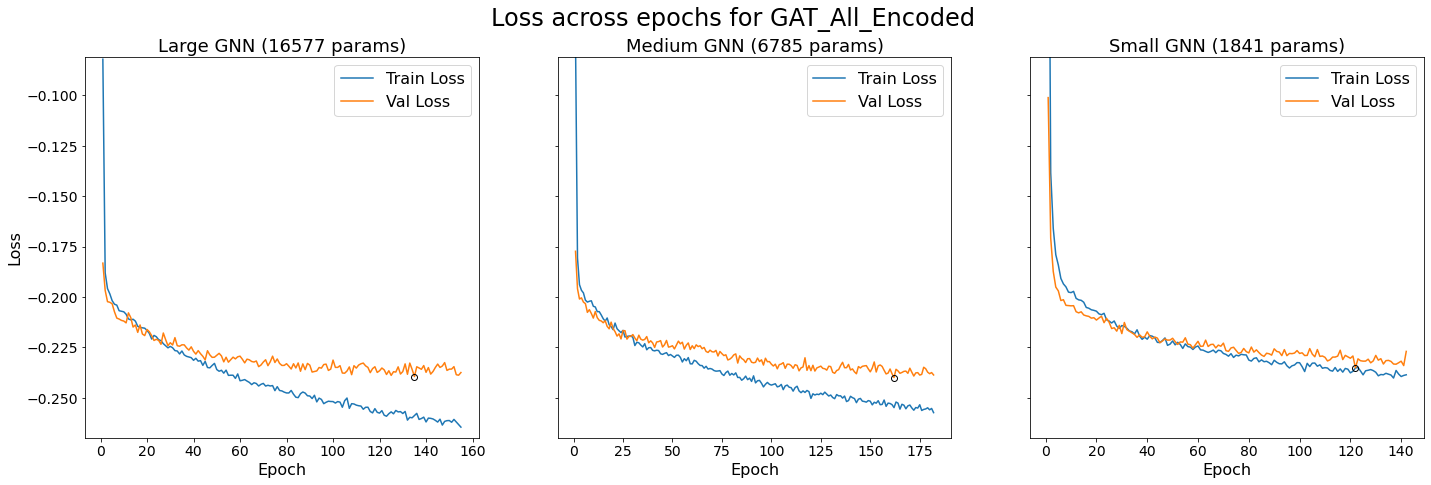

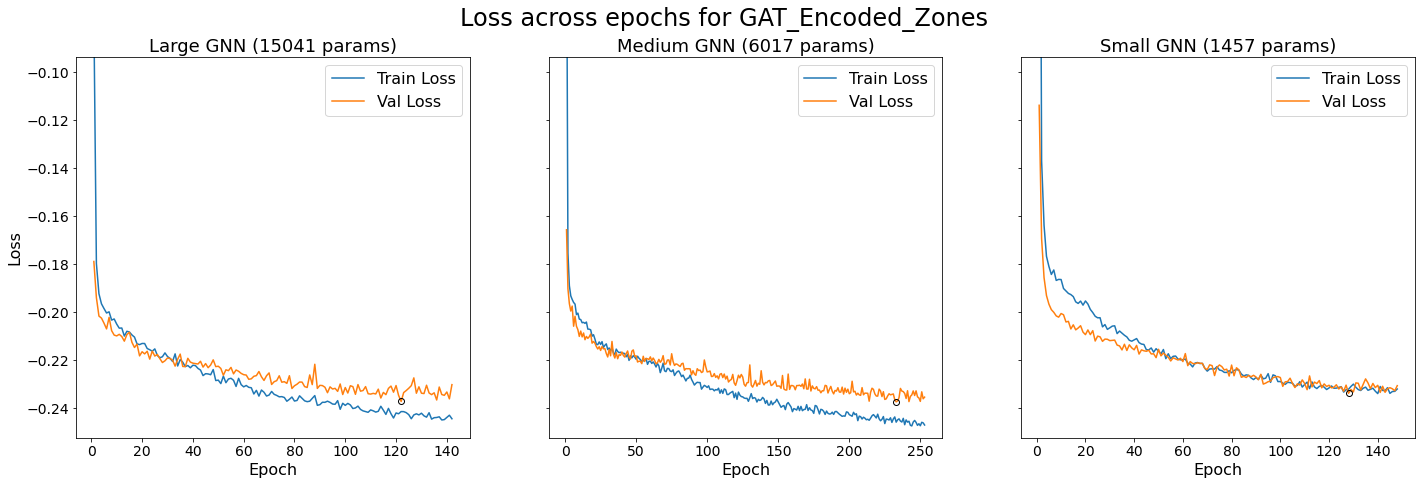

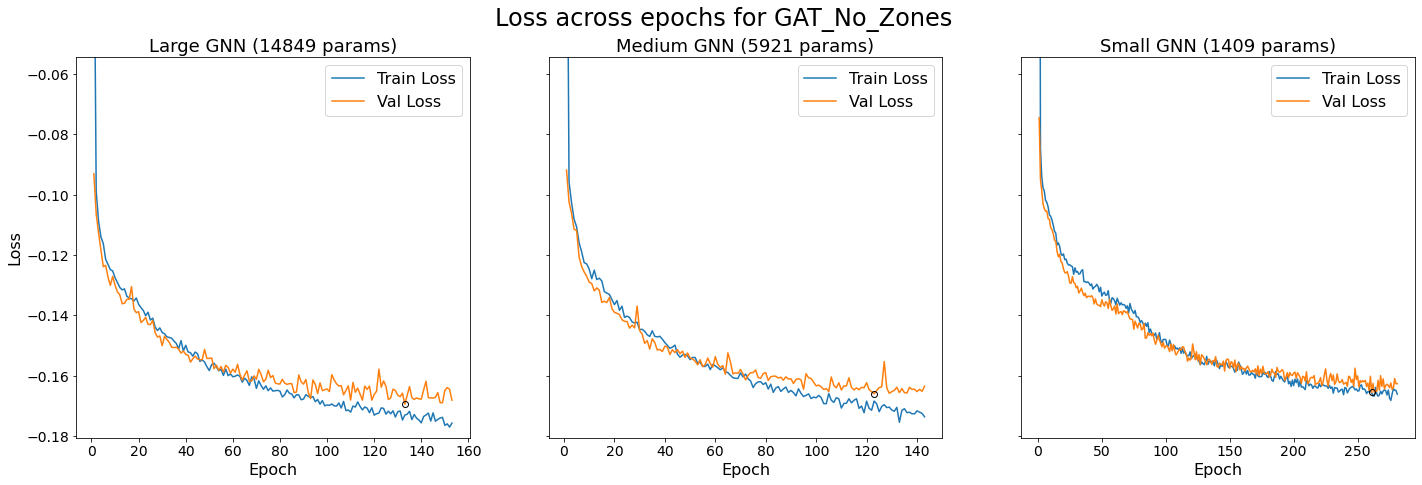

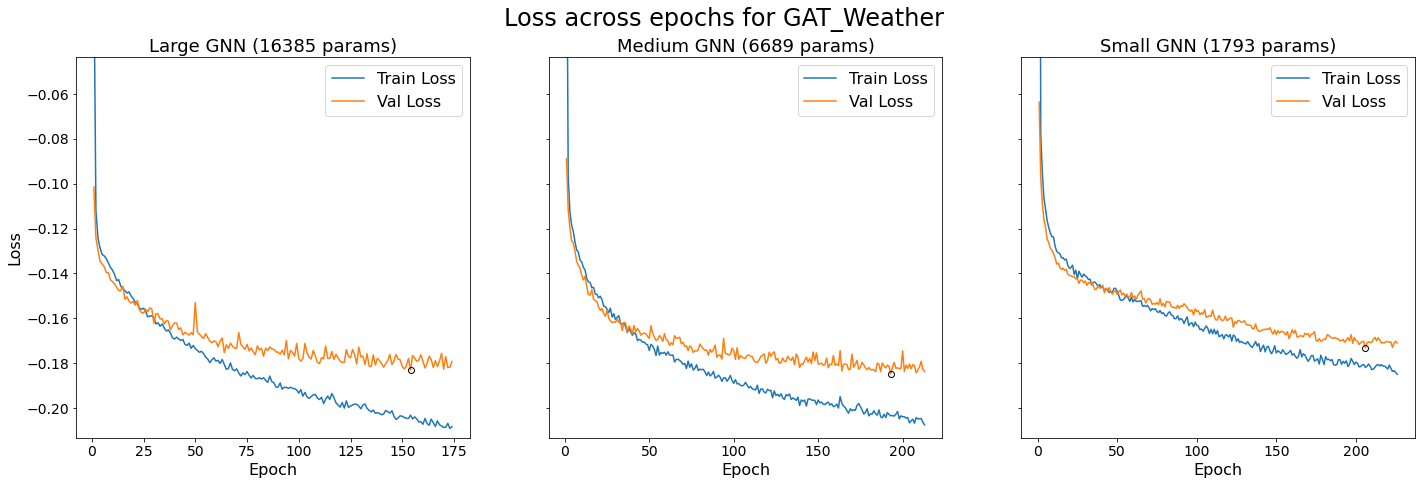

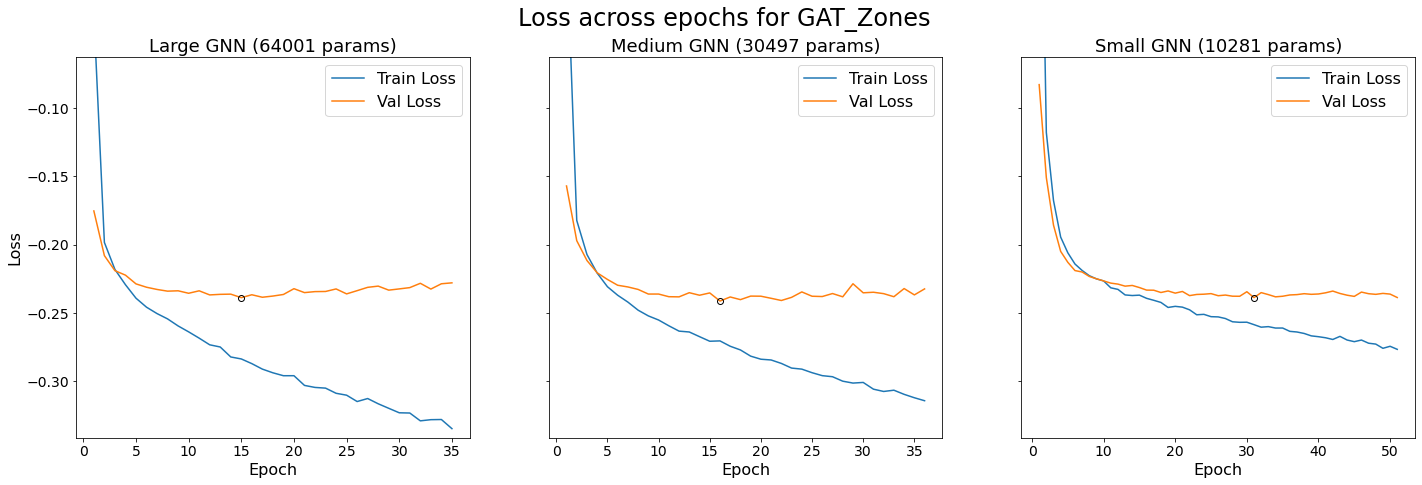

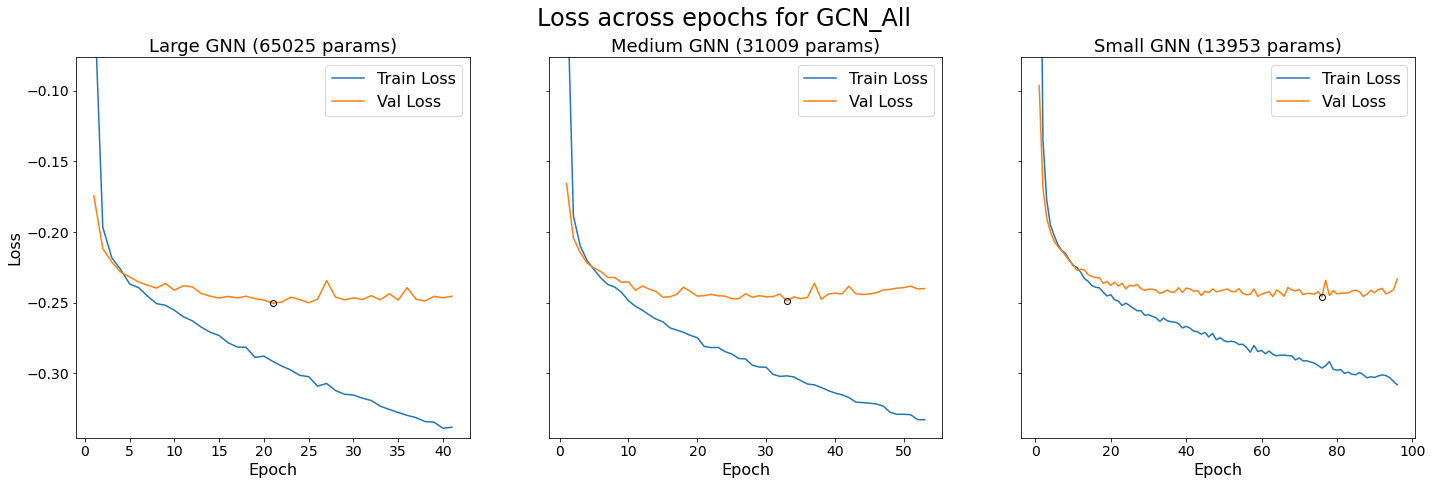

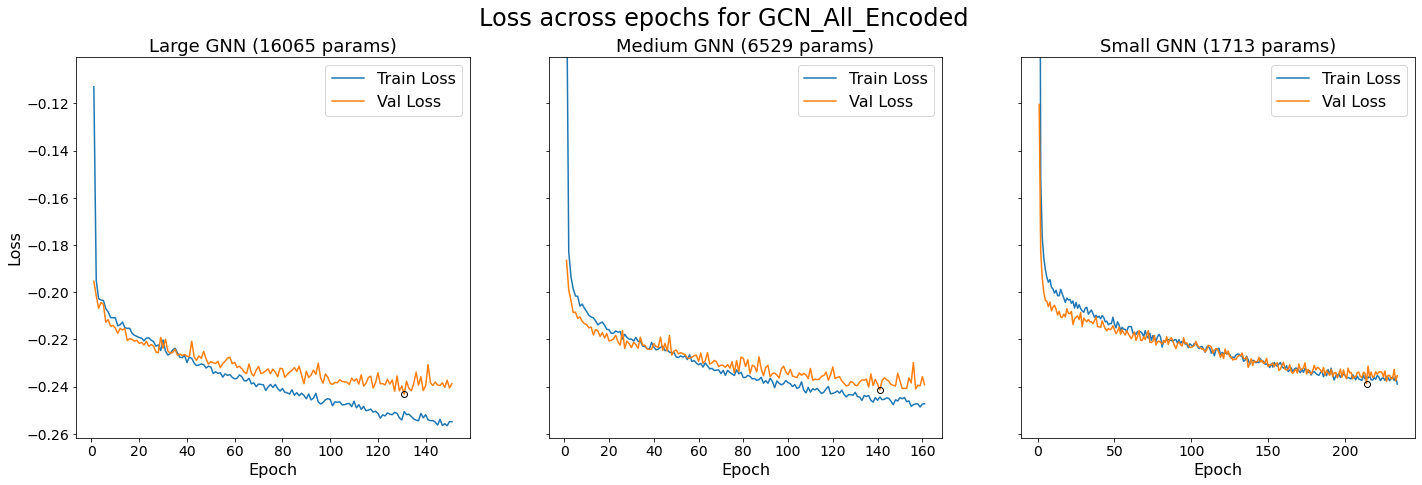

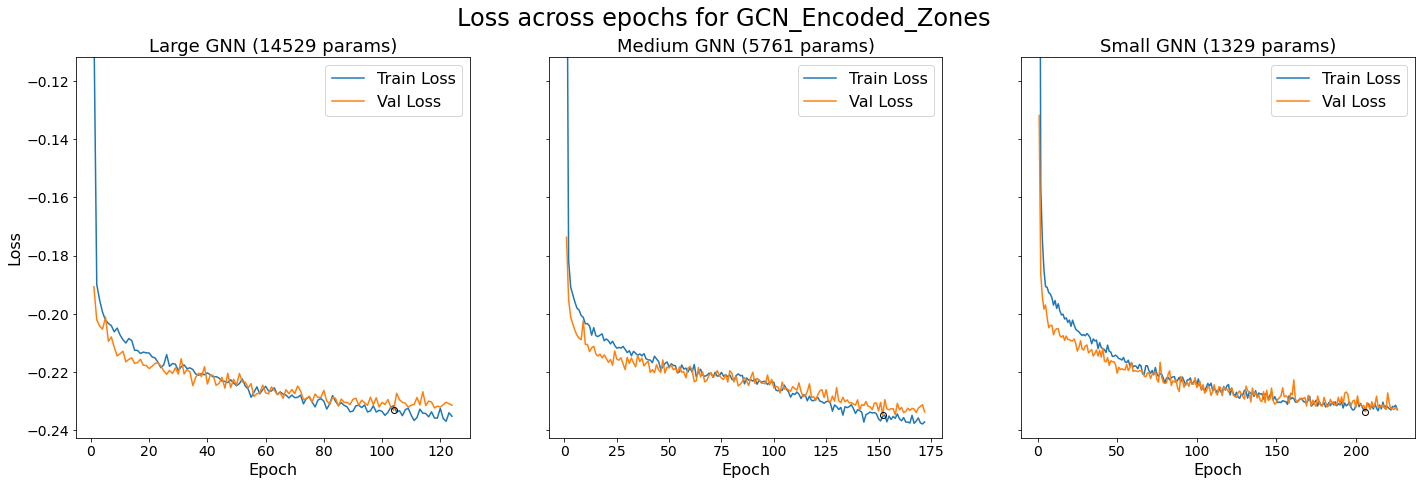

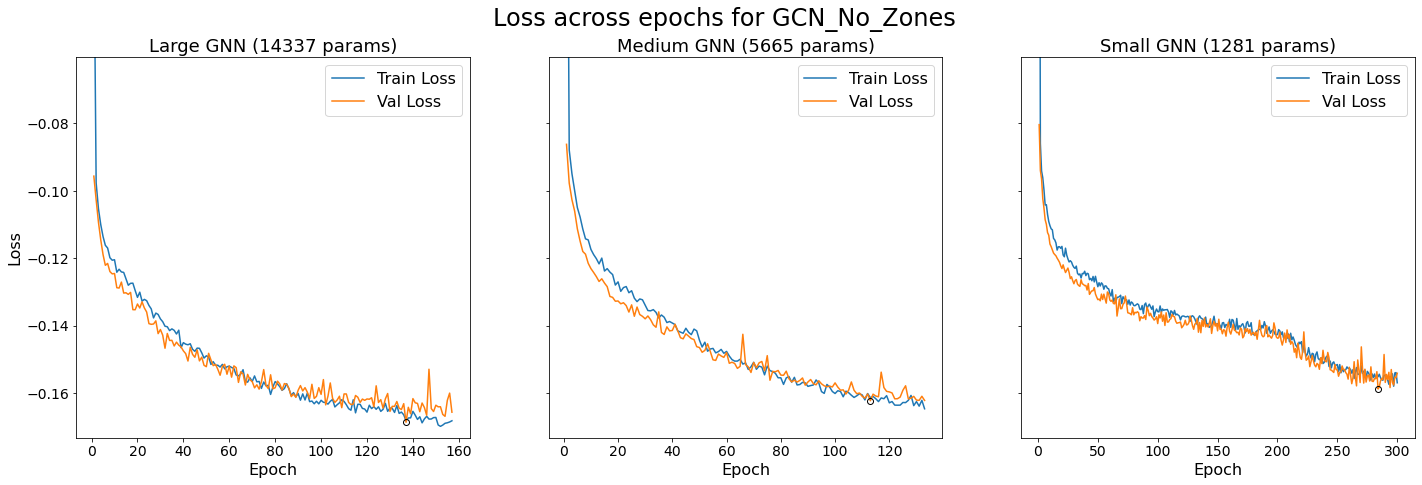

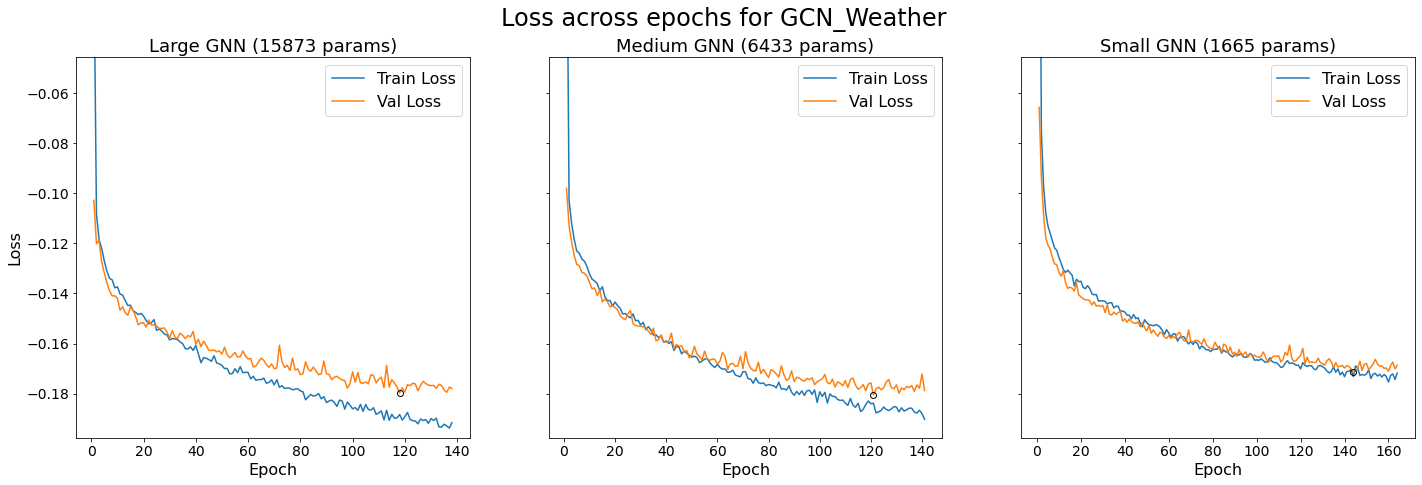

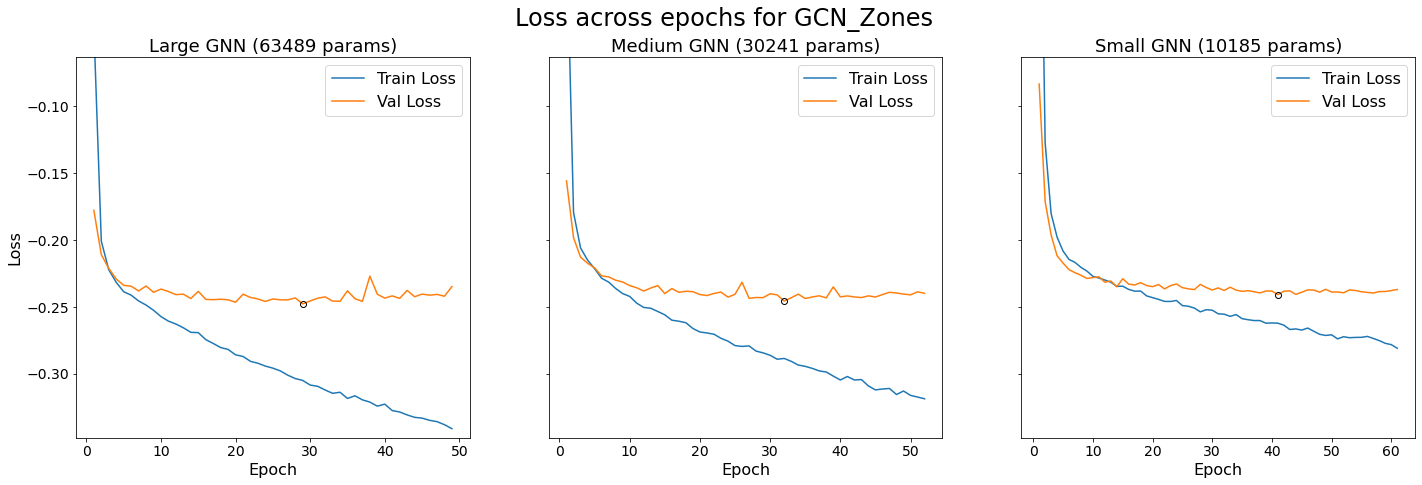

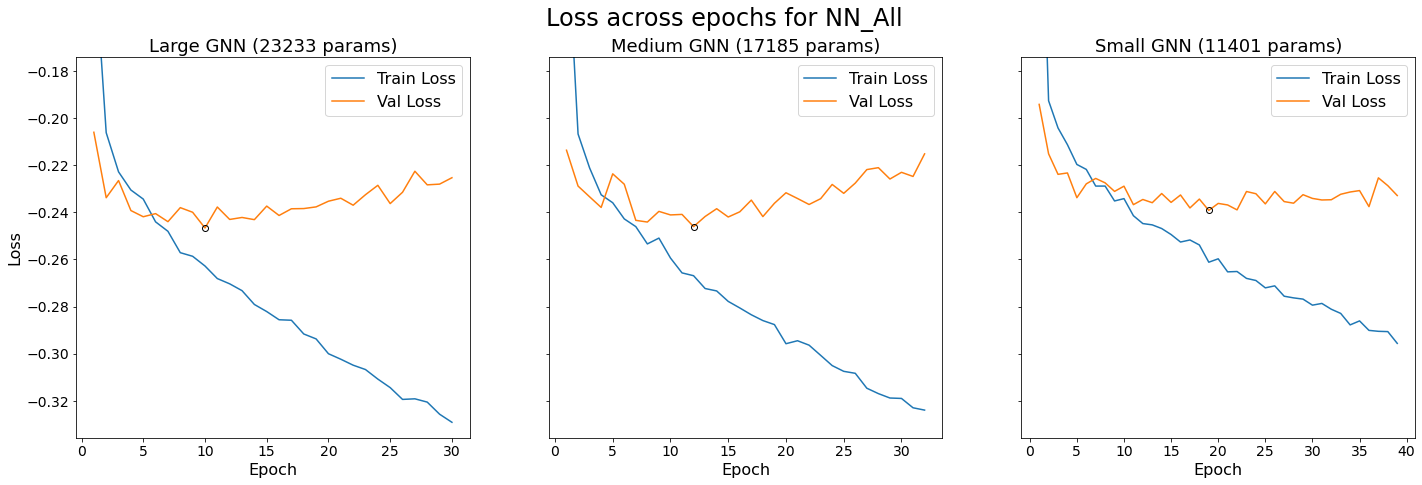

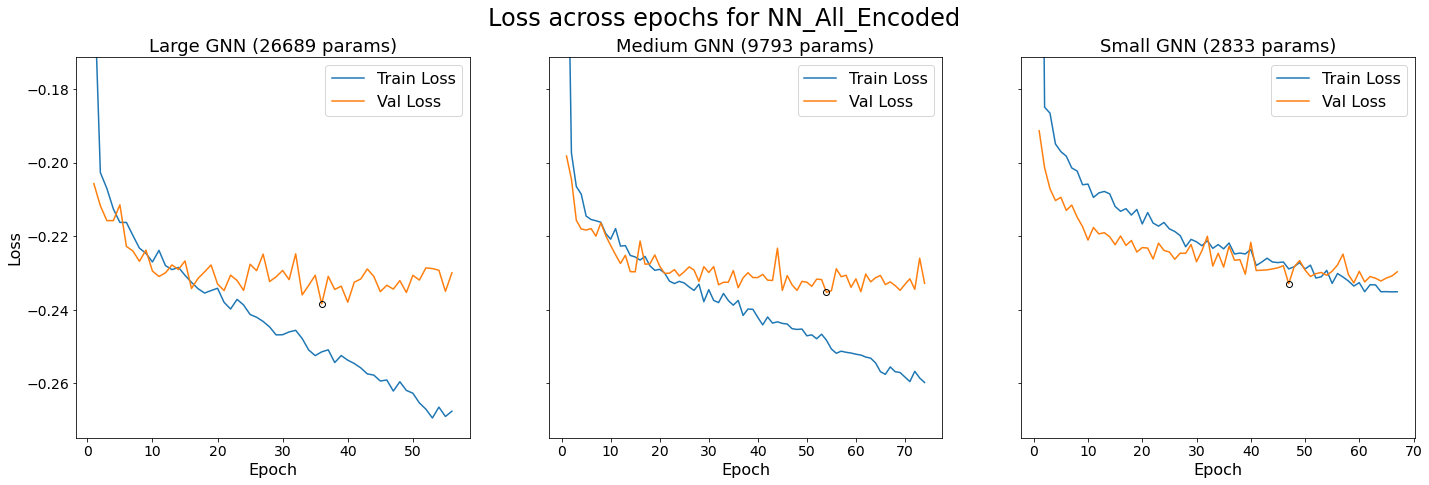

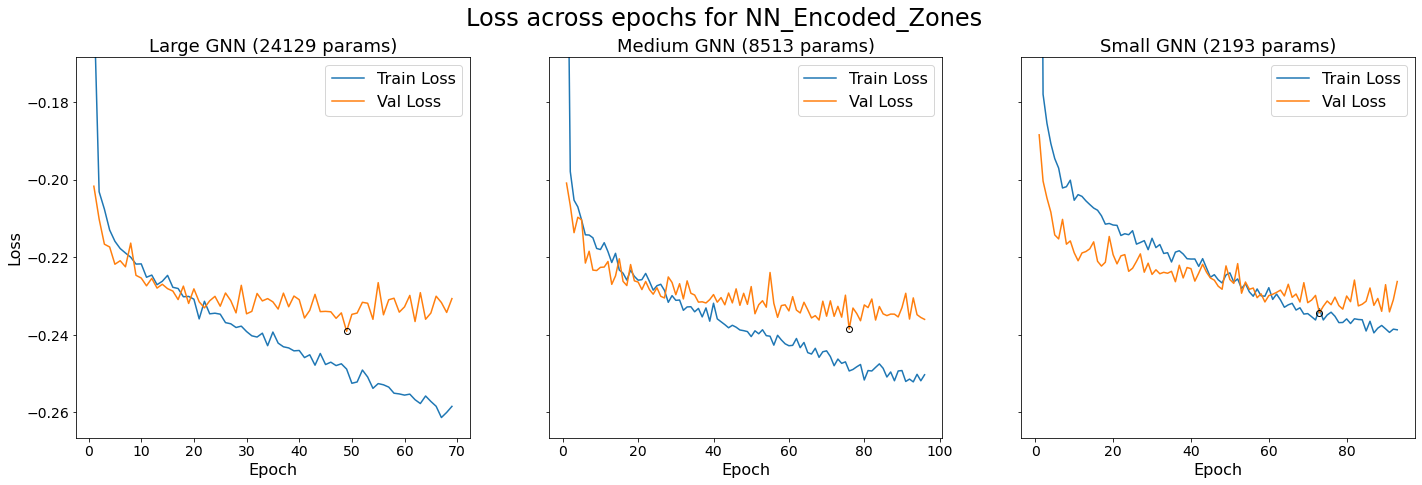

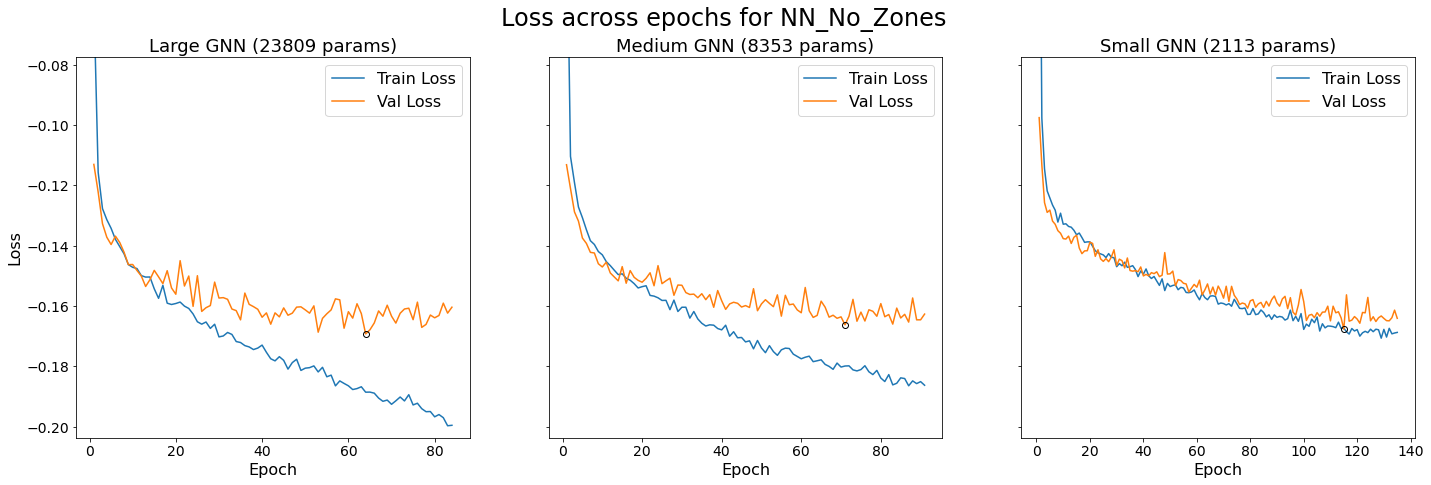

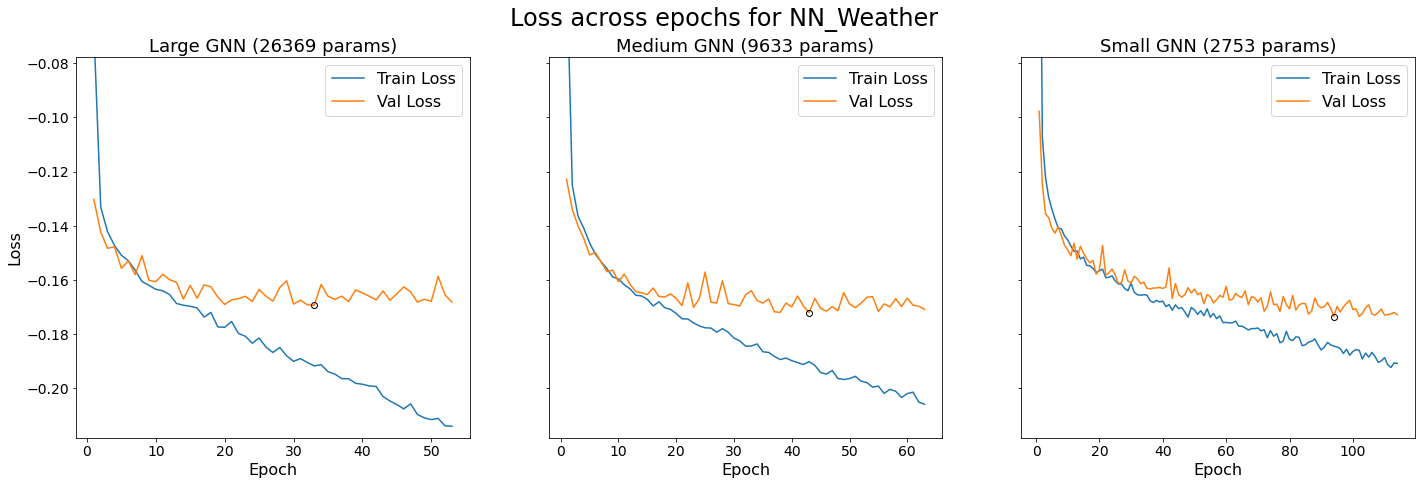

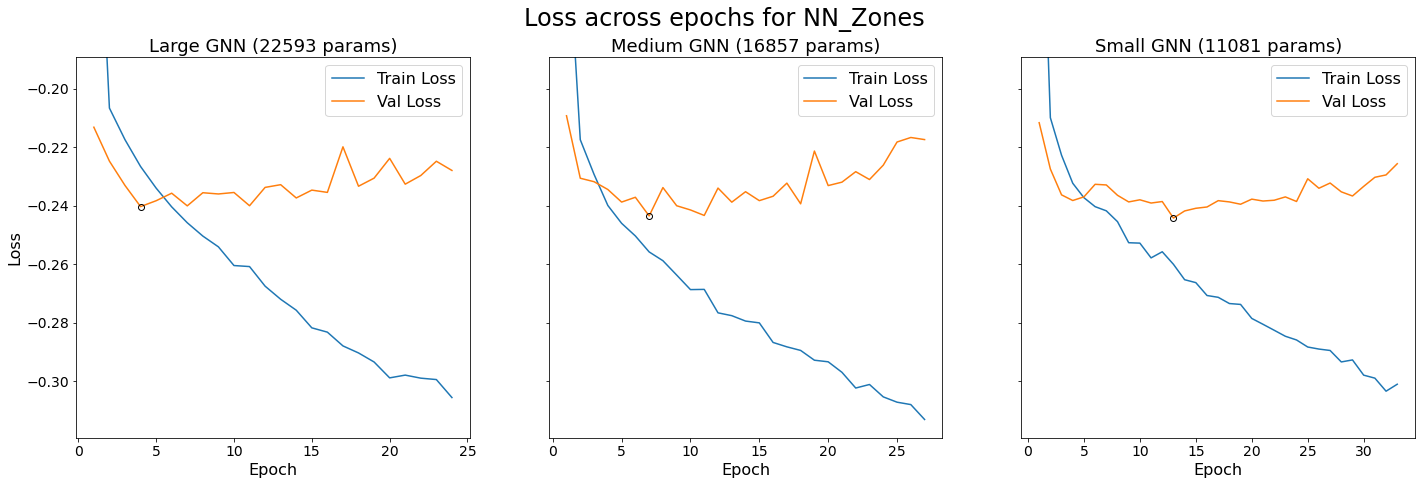

In [7]:
files = sorted([f[:-4] for f in os.listdir("Results/GNN3Sizes")])
for f in files:
    create_loss_plots(f)

## Aggregated results

In [21]:
idx = ['Mean','Std']
cols = ['No Zones', 'Add zones','Add encoded zones', 'Add wather and dist. to station','All','All encoded zones']

In [26]:
# RF,
RFR2 = np.array([
    np.array([0.1178313903706959,0.11766808129333906,0.11774941183559484, 0.11743564720702293, 0.11748025944206664]),
    np.array([0.19690526090306082,0.19733244205749134,0.1974265367928173,0.19685889264388012,0.19677989578124355]),
    np.array([0.23423990239483583,0.23432068265472772,0.23463427777436396,0.23465981921488333,0.23465118151246322]),
    np.array([0.1677902670904684,0.1686542379832453,0.16892118188476535,0.1685795318972091,0.1686518869385114]),
    np.array([0.22036315728277556,0.21991511379710094,0.2203284312486926,0.22068801880505062,0.21956598191007648]),
    np.array([0.24854253134986548,0.24833093928332461,0.24850430483250008,0.24896652352617799,0.2489534888429621])
])

print(pd.DataFrame([RFR2.mean(axis = 1),RFR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

RFF1 = np.array([
    np.array([0.11185682326621924,0.11154081009566458,0.11111111111111112,0.11036448788434128,0.11187957689178193]),
    np.array([0.27455321840898306,0.2732723256547807,0.2734017363851618,0.27453455348690436,0.273972602739726]),
    np.array([0.2882380288238029,0.2850924918389554,0.28495878052574275,0.2840714840714841,0.2869119701909641]),
    np.array([0.1862453531598513,0.19720896070510463,0.19996330948449825,0.1988261188554659,0.19735876742479824]),
    np.array([0.304635761589404,0.2999210734017364,0.2998581113037995,0.30048872773135743,0.3029065200314218]),
    np.array([0.31157315395199514,0.3121936274509804,0.3140672782874618,0.31061418287639764,0.3103289977046672])
])

print(pd.DataFrame([RFF1.mean(axis = 1),RFF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &      Mean &       Std \\
\midrule
No Zones                        &  0.117633 &  0.000153 \\
Add zones                       &  0.197061 &  0.000265 \\
Add encoded zones               &  0.234501 &  0.000182 \\
Add wather and dist. to station &  0.168519 &  0.000383 \\
All                             &  0.220172 &  0.000390 \\
All encoded zones               &  0.248660 &  0.000256 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &      Mean &       Std \\
\midrule
No Zones                        &  0.111351 &  0.000566 \\
Add zones                       &  0.273947 &  0.000541 \\
Add encoded zones               &  0.285855 &  0.001507 \\
Add wather and dist. to station &  0.195921 &  0.004942 \\
All                             &  0.301562 &  0.001898 \\
All encoded zones               &  0.311755 &  0.001335 \\
\bottomrule
\end{tabular}



In [27]:
# MLP,
MLPR2 = np.array([
    np.array([0.11642023894047071,0.1088411966960251,0.11699577155078977,0.11878366879137925,0.11583869376462563]),
    np.array([0.23698169695480498,0.23861735898122272,0.23689931177757417,0.23764950281627883,0.23679760709951225]),
    np.array([0.21186501497496968,0.21353275486680123,0.21288852295769112,0.20806263047743523,0.21498490193405528]),
    np.array([0.13510661836674487,0.13957502818568834,0.13919324610671402,0.13799202899270235,0.1367221225042885]),
    np.array([0.23860093485187417,0.23958334761116218,0.23872571344277926,0.23924197507555933,0.23890034530563564]),
    np.array([0.2177471946921662,0.21297725211006402,0.21489586530722415,0.21186391797169934,0.21464328581324899])
])

print(pd.DataFrame([MLPR2.mean(axis = 1),MLPR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

MLPF1 = np.array([
    np.array([0.09045435598165902,0.039344262295081964,0.08768267223382045,0.09245439469320066,0.08912133891213389]),
    np.array([0.29406474820143885,0.29441776710684275,0.29478729778310364,0.2938629236971778,0.2809005973349671]),
    np.array([0.22652757078986585,0.2292845257903494,0.23462041884816753,0.22237017310252996,0.23668639053254437]),
    np.array([0.08393039918116685,0.08786696776842537,0.09873060648801128,0.08803749745261871,0.11100099108027751]),
    np.array([0.2943995208146151,0.29531414795841493,0.2902453620586475,0.29480636445511854,0.28912386706948645]),
    np.array([0.23893229166666669,0.22372993546251863,0.23650975889781858,0.2242866622428666,0.23219865153757605])
])

print(pd.DataFrame([MLPF1.mean(axis = 1),MLPF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &      Mean &       Std \\
\midrule
No Zones                        &  0.115376 &  0.003413 \\
Add zones                       &  0.237389 &  0.000683 \\
Add encoded zones               &  0.212267 &  0.002333 \\
Add wather and dist. to station &  0.137718 &  0.001644 \\
All                             &  0.239010 &  0.000359 \\
All encoded zones               &  0.214426 &  0.001998 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &      Mean &       Std \\
\midrule
No Zones                        &  0.079811 &  0.020295 \\
Add zones                       &  0.291607 &  0.005362 \\
Add encoded zones               &  0.229898 &  0.005230 \\
Add wather and dist. to station &  0.093913 &  0.009858 \\
All                             &  0.292778 &  0.002567 \\
All encoded zones               &  0.231131 &  0.006206 \\
\bottomrule
\end{tabular}



In [30]:
# GCN
GCNR2 = np.array([
    np.array([0.16544017729536564,0.16376077226346109,0.16782850213318656,0.16524538235717057,0.1634306965046345]),
    np.array([]),
    np.array([0.22772401337800696,0.2269036877879087,0.22800923855820865,0.2272709746678494,0.2126668831888524,]),
    np.array([0.17948495862731084,0.17847518184490385,0.17769435305649972,0.1752245044643378,0.17707159407582396]),
    np.array([]),
    np.array([0.2338240564728692,0.2339383779318691,0.22961340160317378,0.2310235001057842,0.23240284853678894])
])

print(pd.DataFrame([GCNR2.mean(axis = 1),GCNR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

GCNF1 = np.array([
    np.array([0.1485299732722413,0.12298507462686567,0.1494208494208494,0.14666922633902862,0.1283359497645212]),
    np.array([]),
    np.array([0.24751669109265592,0.2421539478031054,0.25422338855174675,0.23406054456282768,0.21638902910987717]),
    np.array([0.1734637386971766,0.16057564855141074,0.14628527548473794,0.16040955631399317,0.14891575513337169]),
    np.array([]),
    np.array([0.2740752302169502,0.27884173433430365,0.24611864683771856,0.25194300518134716,0.2592652013476656])
])

print(pd.DataFrame([GCNF1.mean(axis = 1),GCNF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

/var/folders/3z/pggbcw7949507j0lbw1gjngc0000gn/T/ipykernel_23323/992161715.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  GCNR2 = np.array([


AxisError: axis 1 is out of bounds for array of dimension 1

In [29]:
# GAT
GATR2 = np.array([
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([])
])

print(pd.DataFrame([GATR2.mean(axis = 1),GATR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

GATF1 = np.array([
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([])
])

print(pd.DataFrame([GATF1.mean(axis = 1),GATF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Mean &  Std \\
\midrule
No Zones                        &   NaN &  NaN \\
Add zones                       &   NaN &  NaN \\
Add encoded zones               &   NaN &  NaN \\
Add wather and dist. to station &   NaN &  NaN \\
All                             &   NaN &  NaN \\
All encoded zones               &   NaN &  NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  Mean &  Std \\
\midrule
No Zones                        &   NaN &  NaN \\
Add zones                       &   NaN &  NaN \\
Add encoded zones               &   NaN &  NaN \\
Add wather and dist. to station &   NaN &  NaN \\
All                             &   NaN &  NaN \\
All encoded zones               &   NaN &  NaN \\
\bottomrule
\end{tabular}



/var/folders/3z/pggbcw7949507j0lbw1gjngc0000gn/T/ipykernel_23323/2019905.py:11: RuntimeWarning: Mean of empty slice.
  print(pd.DataFrame([GATR2.mean(axis = 1),GATR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())
/var/folders/3z/pggbcw7949507j0lbw1gjngc0000gn/T/ipykernel_23323/2019905.py:22: RuntimeWarning: Mean of empty slice.
  print(pd.DataFrame([GATF1.mean(axis = 1),GATF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())


In [28]:
# NNC
NNCR2 = np.array([
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([])
])

print(pd.DataFrame([NNCR2.mean(axis = 1),NNCR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

NNCF1 = np.array([
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([])
])

print(pd.DataFrame([NNCF1.mean(axis = 1),NNCF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Mean &  Std \\
\midrule
No Zones                        &   NaN &  NaN \\
Add zones                       &   NaN &  NaN \\
Add encoded zones               &   NaN &  NaN \\
Add wather and dist. to station &   NaN &  NaN \\
All                             &   NaN &  NaN \\
All encoded zones               &   NaN &  NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  Mean &  Std \\
\midrule
No Zones                        &   NaN &  NaN \\
Add zones                       &   NaN &  NaN \\
Add encoded zones               &   NaN &  NaN \\
Add wather and dist. to station &   NaN &  NaN \\
All                             &   NaN &  NaN \\
All encoded zones               &   NaN &  NaN \\
\bottomrule
\end{tabular}



/var/folders/3z/pggbcw7949507j0lbw1gjngc0000gn/T/ipykernel_23323/3651395722.py:11: RuntimeWarning: Mean of empty slice.
  print(pd.DataFrame([NNCR2.mean(axis = 1),NNCR2.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())
/opt/anaconda3/envs/GNN_env/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/anaconda3/envs/GNN_env/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/GNN_env/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/envs/GNN_env/lib/python3.9/site-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/var/folders/3z/pggbcw7949